# Demo Topic Trends

The Semantic Trend class carries out trend detection & topic detection over time. It uses coincepts from Finance (Candles, and moving-averages)

In [1]:
import pandas as pd
from bunkatech.time import SemanticsTrends
import warnings
warnings.filterwarnings('ignore')
 
    
data = pd.read_csv('../data/imdb.csv', index_col = [0])
data = data.sample(2000, random_state = 42)

In [2]:
trends = SemanticsTrends(data = data,
                        text_var = 'description',
                        index_var = 'imdb',
                        extract_terms=True,
                        terms_embedding=True,
                        docs_embedding=True,
                        sample_size_terms=2000,
                        terms_limit=2000,
                        terms_ents=False,
                        terms_ngrams=(2, 2),
                        terms_ncs=False,
                        terms_include_pos=["NOUN", "PROPN", "ADJ"],
                        terms_include_types=["PERSON", "ORG"],
                        terms_embedding_model="all-MiniLM-L6-v2",
                        docs_embedding_model="all-MiniLM-L6-v2",
                        language="en",
                        terms_path=None,
                        docs_dimension_reduction = 5,
                        terms_embeddings_path=None,
                        docs_embeddings_path=None,
                        docs_multiprocessing = True,
                        terms_multiprocessing = True)

  0%|                                                                           | 0/1991 [00:00<?, ?it/s]2022-03-31 09:10:48,829 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-31 09:10:48,837 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-31 09:10:48,842 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-31 09:10:48,842 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-31 09:10:48,859 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-31 09:10:48,861 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-31 09:10:48,864 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-31 09:10:48,893 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
100%|███████████████████████████████████████████████████████████████| 1991/1991 [00:08<00:00, 223.11it/s]
2022-03-31 09:10:51,596 - INFO : Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2022-03-31 09:10:59,035 - INFO : Use pytorch device: c

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2022-03-31 09:11:07,091 - INFO : Load pretrained SentenceTransformer: all-MiniLM-L6-v2


Start Embedding...


2022-03-31 09:11:14,631 - INFO : Use pytorch device: cpu
2022-03-31 09:11:14,632 - INFO : CUDA is not available. Start 4 CPU worker
2022-03-31 09:11:14,632 - INFO : Start multi-process pool on devices: cpu, cpu, cpu, cpu


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2022-03-31 09:11:19,960 - INFO : Chunk data into packages of size 50


UMAP(n_components=5, verbose=True)
Thu Mar 31 09:11:35 2022 Construct fuzzy simplicial set
Thu Mar 31 09:11:37 2022 Finding Nearest Neighbors
Thu Mar 31 09:11:38 2022 Finished Nearest Neighbor Search
Thu Mar 31 09:11:39 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Mar 31 09:11:41 2022 Finished embedding


#### Fit with the name of the column referencing to the time

In [5]:
trends.fit('year')

#### Display the trend by comparing two moving averages: the smoothing_scale and the context_scale.

If the time is year, then smoothing_scale = 2, refers to 2 years.

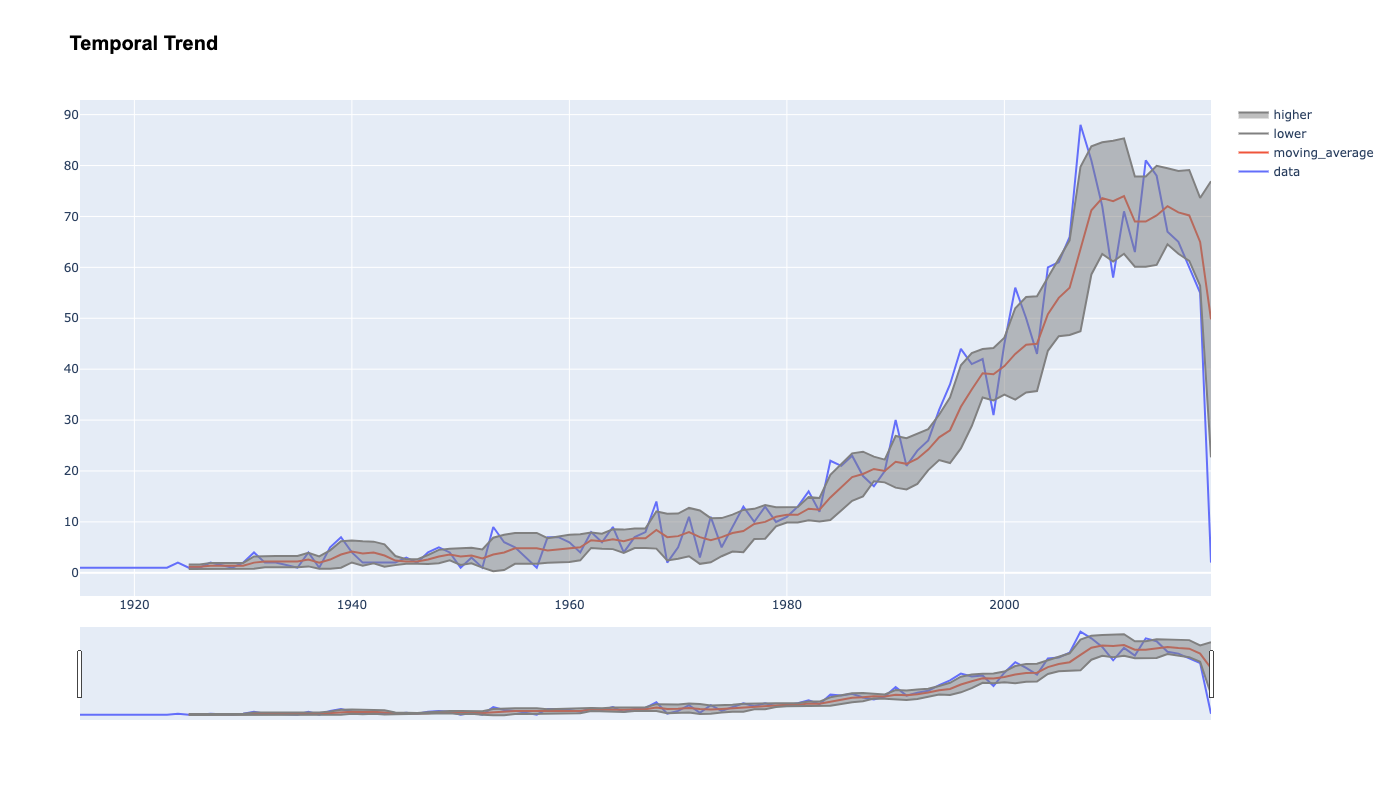

In [11]:
fig = trends.classic_trend(smoothing_scale=5, # 2 years
                    context_scale=5, # 5 years
                    height=800,
                    width=1200,
                    stv_scale=1) # the stv over the context_scale

fig.show()

In [8]:
# If you wish to export the .html fig
import plotly
plotly.offline.plot(fig, filename = 'fig.html', auto_open=False)